Q1. What is the mathematical formula for a linear SVM?

-> (a*b + c)^d  where a and b are the independent variable , c is the constant and d is the dimension 

Q2. What is the objective function of a linear SVM?

-> To find the best fit line along with the marginal plane . In a given scenario there can be many possibe best fit line , however we must select the one that is more general and it is obtained by using the marginal plane.

Q3. What is the kernel trick in SVM?

-> Kernel does not does the transformation but directly computes the result for which which should be calculated after doing the transformation , thereby saving computational power and this is known as kernel trick 

Q4. What is the role of support vectors in SVM Explain with example

-> Support vector help to find the marginal plance , in case of hard margin they are the datapoints that are closest to the best fit line and in case of soft margin they may lie between the marginal plane and the best fit line 

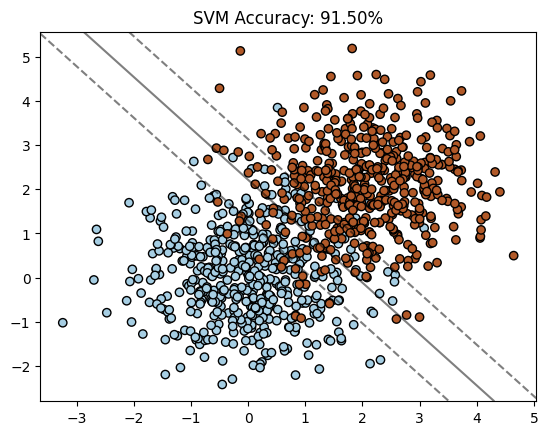

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Set seed for reproducibility
np.random.seed(42)

# Generate two sets of points with some overlap
class_1 = np.random.normal(loc=0, scale=1, size=(500, 2))
class_2 = np.random.normal(loc=2, scale=1, size=(500, 2))

# Create labels for the two classes
labels_class_1 = np.zeros((500,))
labels_class_2 = np.ones((500,))

# Combine data and labels
X = np.vstack((class_1, class_2))
y = np.concatenate((labels_class_1, labels_class_2))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot the data points and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.title(f'SVM Accuracy: {accuracy * 100:.2f}%')
plt.show()


Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?

-> Hyperplane : hyperplane are decision boundary that help to classify the data , Marginal plance are plane that are present beside the Hyperplane , they help to decide the best hyperplane , Soft margin is the distance between the marginal plane and the hyperplane when we have misclassified data , Hard margin is the distance between the marginal and the hyperplane when we dont have misclassified data

Q6. SVM Implementation through Iris dataset.


~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
~ Compute the accuracy of the model on the testing setl
~ Plot the decision boundaries of the trained model using two of the featuresl
~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.

Accuracy for C=0.1: 90.00%


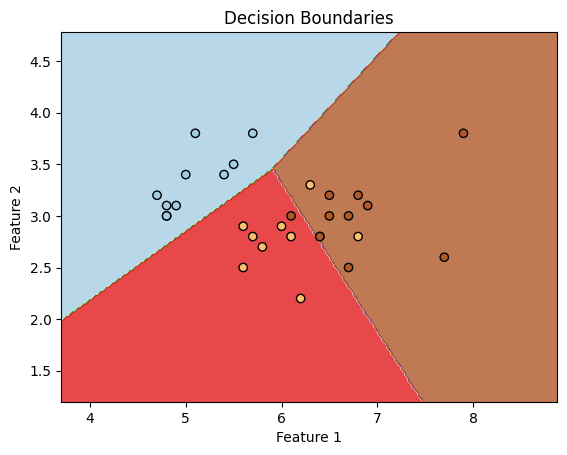

Accuracy for C=1: 90.00%


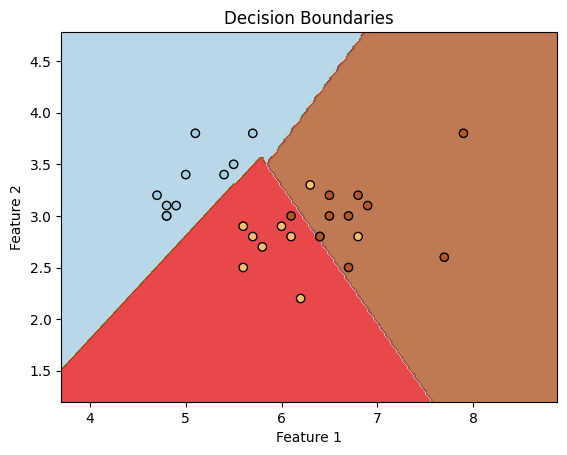

Accuracy for C=10: 90.00%


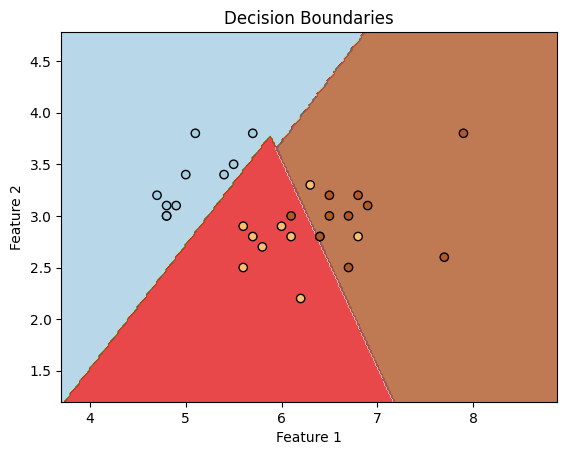

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take only the first two features for visualization
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear SVM classifier
def train_svm(C_value):
    svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=C_value))
    svm_model.fit(X_train, y_train)
    return svm_model

# Predict labels for the testing set and compute accuracy
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Plot decision boundaries
def plot_decision_boundaries(model, X, y):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.title("Decision Boundaries")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Train and evaluate the model with different values of C
C_values = [0.1, 1, 10]

for C_value in C_values:
    svm_model = train_svm(C_value)
    accuracy = evaluate_model(svm_model, X_test, y_test)
    print(f"Accuracy for C={C_value}: {accuracy * 100:.2f}%")

    # Plot decision boundaries using the first two features
    plot_decision_boundaries(svm_model, X_test, y_test)


Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take only the first two features for visualization
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Linear SVM from scratch
class LinearSVM:
    def __init__(self, learning_rate=0.01, n_iterations=1000, C=1.0):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.C = C
        self.weights = None

    def fit(self, X, y):
        # Add a bias term to the data
        X = np.c_[np.ones(X.shape[0]), X]
        m, n = X.shape
        self.weights = np.zeros(n)

        for _ in range(self.n_iterations):
            for i in range(m):
                if y[i] * np.dot(X[i], self.weights) < 1:
                    gradient = -self.C * y[i] * X[i] + 2 * self.weights
                else:
                    gradient = 2 * self.weights
                self.weights -= self.learning_rate * gradient

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return np.sign(np.dot(X, self.weights))

# Train Linear SVM from scratch
svm_scratch = LinearSVM()
svm_scratch.fit(X_train, y_train)

# Predict labels for the testing set
y_pred_scratch = svm_scratch.predict(X_test)

# Compute accuracy
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print(f"Accuracy of Linear SVM from scratch: {accuracy_scratch * 100:.2f}%")

# Train Linear SVM using scikit-learn
svm_sklearn = SVC(kernel='linear', C=1.0)
svm_sklearn.fit(X_train, y_train)

# Predict labels for the testing set
y_pred_sklearn = svm_sklearn.predict(X_test)

# Compute accuracy
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Accuracy of Linear SVM using scikit-learn: {accuracy_sklearn * 100:.2f}%")


Accuracy of Linear SVM from scratch: 30.00%
Accuracy of Linear SVM using scikit-learn: 90.00%
